In [39]:
import wooldridge
from wooldridge import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t as t_dist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:
import pandas as pd

df = pd.read_csv("train.csv")

df['Weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)
df["Morning"] = df["hour_of_day"].apply(lambda x: 1 if x <= 12 else 0)
df["Evening"] = df["hour_of_day"].apply(lambda x: 1 if x >= 18 else 0)
df["Weekday"] = df['day_of_week'].apply(lambda x: 1 if x in [0,1,2,3,4] else 0)

df['Winter'] = df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)

df.head()


,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Weekend,Morning,Evening,Weekday,Winter
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,7,2,6,2131.0,24.30,0,1,0,1,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,25,6,10,2377.0,37.40,1,1,0,0,1
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,29,0,8,1286.0,30.36,0,1,0,1,1
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,25,1,20,2586.0,4.30,0,0,1,1,0
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,20,0,21,1575.0,23.80,0,0,1,1,0


In [41]:
model_with_all = smf.ols(formula='fare_amount ~ trip_duration + Weekend  + Winter + trip_distance + Morning + Evening', data=df)
model_with_all = model_with_all.fit()
print(model_with_all.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 1.338e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:38:14   Log-Likelihood:            -1.2285e+05
No. Observations:               35000   AIC:                         2.457e+05
Df Residuals:                   34993   BIC:                         2.458e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4358      0.125     75.593

<h2>Data distributions</h2>

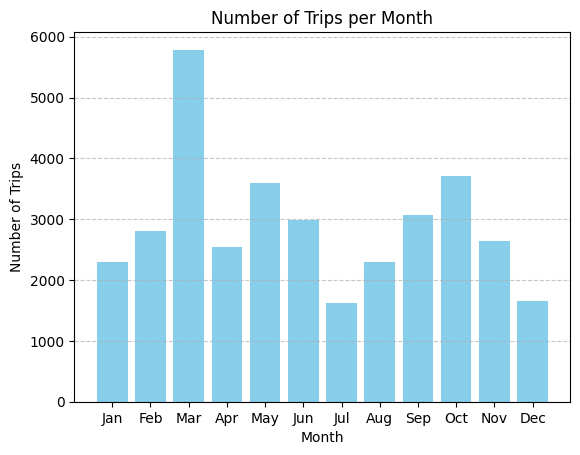

In [42]:

monthly_trip_counts = df.groupby('month').size().reset_index(name='trip_count')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.bar(monthly_trip_counts['month'], monthly_trip_counts['trip_count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month')
plt.xticks(monthly_trip_counts['month'], month_names) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

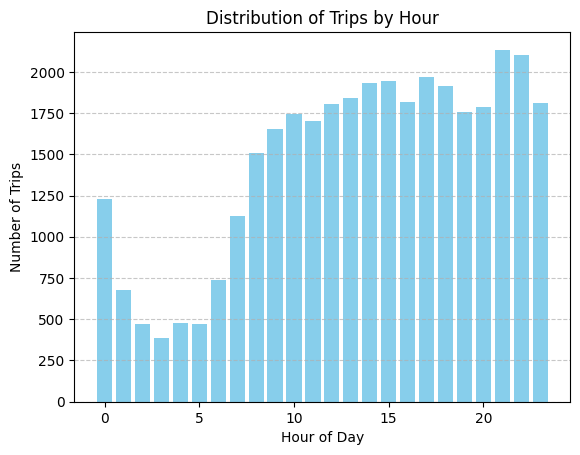

In [43]:

hourly_trip_counts = df.groupby('hour_of_day').size().reset_index(name='trip_count')
plt.bar(hourly_trip_counts['hour_of_day'], hourly_trip_counts['trip_count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Hour')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


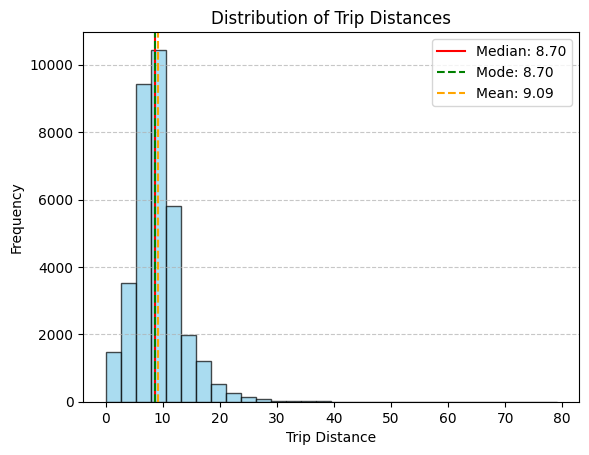

In [44]:
plt.hist(df['trip_distance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

median_distance = df['trip_distance'].median()
mode_distance = df['trip_distance'].mode()[0]
mean_distance = df['trip_distance'].mean()

plt.axvline(x=median_distance, color='red', linestyle='-', label=f'Median: {median_distance:.2f}')
plt.axvline(x=mode_distance, color='green', linestyle='--', label=f'Mode: {mode_distance:.2f}')
plt.axvline(x=mean_distance, color='orange', linestyle='--', label=f'Mean: {mean_distance:.2f}')

plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


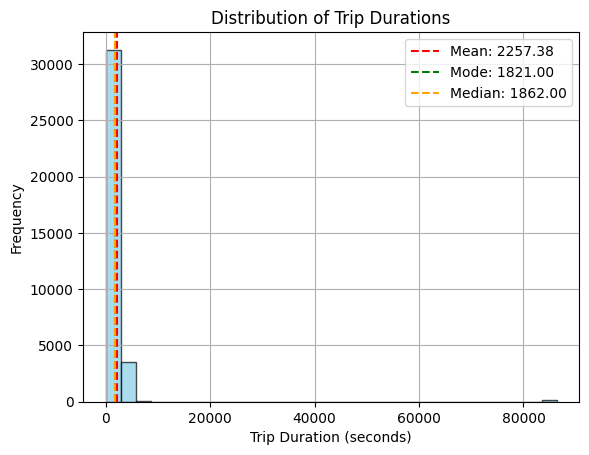

In [45]:
plt.hist(df['trip_duration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

mean_duration = df['trip_duration'].mean()
mode_duration = df['trip_duration'].mode()[0]
median_duration = df['trip_duration'].median()

plt.axvline(x=mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.2f}')
plt.axvline(x=mode_duration, color='green', linestyle='--', label=f'Mode: {mode_duration:.2f}')
plt.axvline(x=median_duration, color='orange', linestyle='--', label=f'Median: {median_duration:.2f}')

plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.legend()
plt.grid(True)
plt.show()


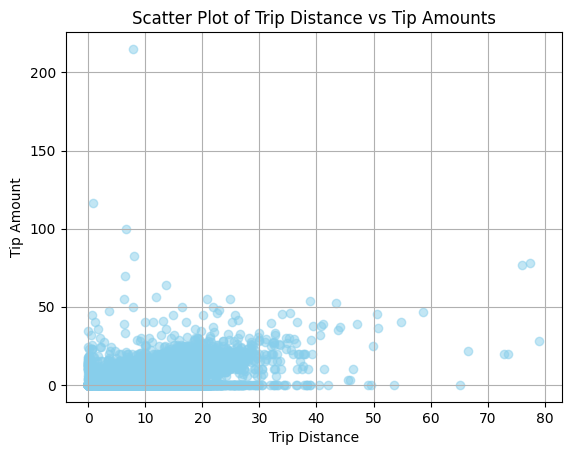

In [46]:
plt.scatter(df['trip_distance'], df['tip_amount'], color='skyblue', alpha=0.5)

plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot of Trip Distance vs Tip Amounts')
plt.grid(True)
plt.show()

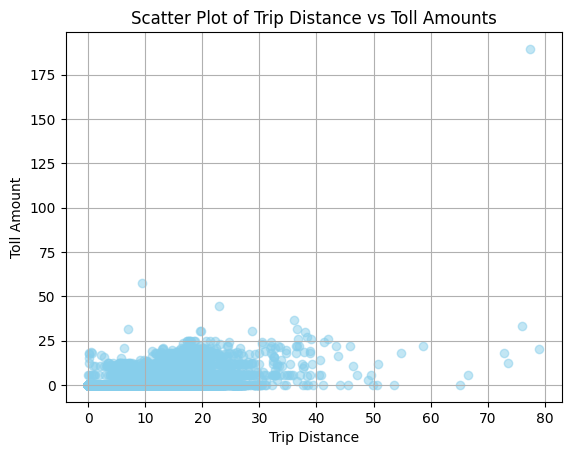

In [47]:
plt.scatter(df['trip_distance'], df['tolls_amount'], color='skyblue', alpha=0.5)

plt.xlabel('Trip Distance')
plt.ylabel('Toll Amount')
plt.title('Scatter Plot of Trip Distance vs Toll Amounts')
plt.grid(True)
plt.show()

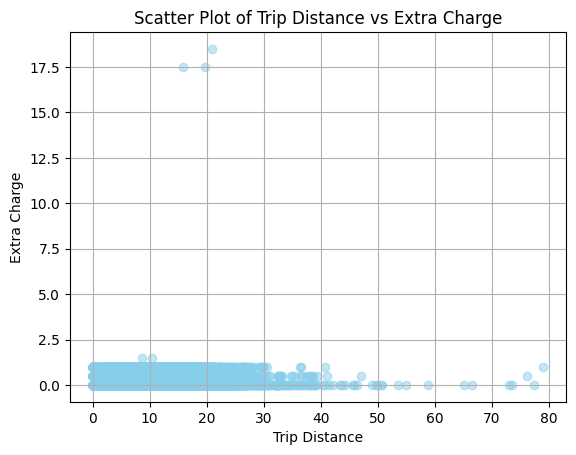

In [48]:
plt.scatter(df['trip_distance'], df['extra'], color='skyblue', alpha=0.5)

plt.xlabel('Trip Distance')
plt.ylabel('Extra Charge')
plt.title('Scatter Plot of Trip Distance vs Extra Charge')
plt.grid(True)
plt.show()

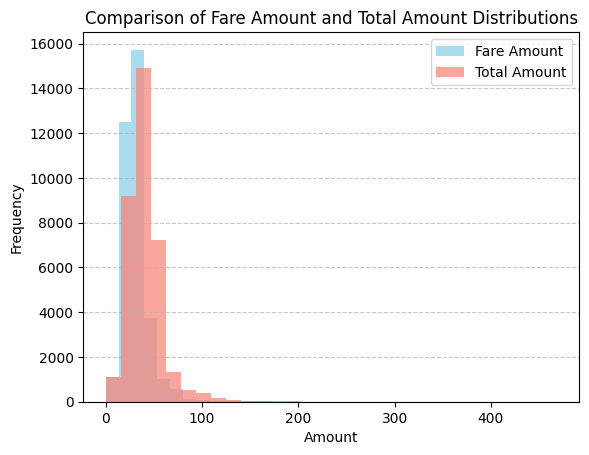

In [49]:
plt.hist(df['fare_amount'], bins=30, color='skyblue', alpha=0.7, label='Fare Amount')
plt.hist(df['total_amount'], bins=30, color='salmon', alpha=0.7, label='Total Amount')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Fare Amount and Total Amount Distributions')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

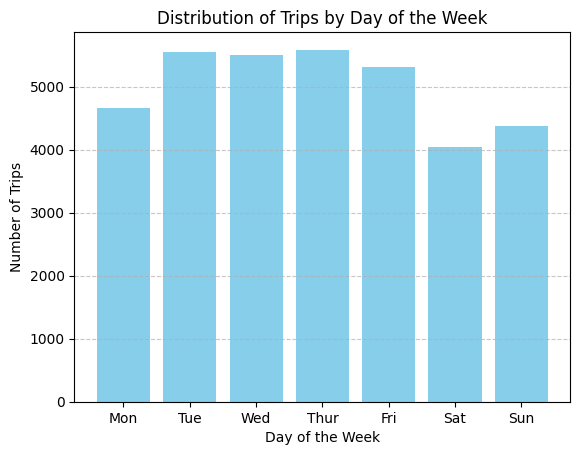

In [50]:
daily_trip_counts = df.groupby('day_of_week').size().reset_index(name='trip_count')

day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

plt.bar(daily_trip_counts['day_of_week'], daily_trip_counts['trip_count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Day of the Week')
plt.xticks(daily_trip_counts['day_of_week'], day_names) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


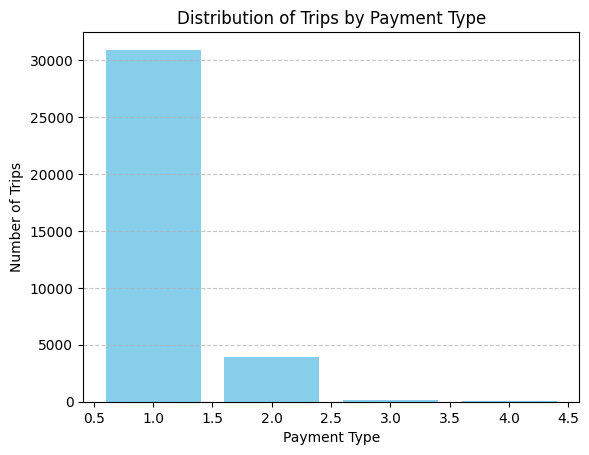

In [51]:
payment_type_counts = df['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['Payment Type', 'Trip Count']

plt.bar(payment_type_counts['Payment Type'], payment_type_counts['Trip Count'], color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Payment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>Model testing</h2>


In [52]:
from sklearn.metrics import mean_absolute_error
testinf_df = pd.read_csv("test.csv")
testinf_df['Weekend'] = testinf_df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)
testinf_df["Morning"] = testinf_df["hour_of_day"].apply(lambda x: 1 if x <= 12 else 0)
testinf_df["Evening"] = testinf_df["hour_of_day"].apply(lambda x: 1 if x >= 18 else 0)
testinf_df["Weekday"] = testinf_df['day_of_week'].apply(lambda x: 1 if x in [0,1,2,3,4] else 0)

testinf_df['Winter'] = testinf_df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)

X_test = testinf_df[["trip_duration", "Weekend", "Winter", "trip_distance", "Morning", "Evening"]]
y_test = testinf_df["fare_amount"]
y_pred = model_with_all.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MSE):", mae)

Mean Absolute Error (MSE): 4.226964533345653


<h2>Hypotheses testing</h2>

In [53]:
weekend_beta = model_with_all.params['Weekend']
print(weekend_beta)
weekend_se = model_with_all.bse['Weekend']
print(weekend_se)

-1.2570447667954772
0.10136151438957453


In [54]:
t_stat = (weekend_beta - 0) / weekend_se
t_stat
alpha = 0.05
critical_value = t_dist.ppf(alpha, len(df) - 1 - 7)
print("T statistics is: " + str(t_stat))
print("Critical value is: " + str(critical_value))

T statistics is: -12.401598124946421
Critical value is: -1.6448971743261551


Yes, it turns out that as our t-statistics is less then -1.65, on weekdays taxi costs more 

In [55]:
winter_beta = model_with_all.params['Winter']
winter_se = model_with_all.bse['Winter']
t_stat = (winter_beta - 0) / winter_se
t_stat
alpha = 0.05
critical_value = t_dist.ppf(1 - alpha, len(df) - 1 - 7)
print("T statistics is: " + str(t_stat))
print("Critical value is: " + str(critical_value))


T statistics is: -5.667809618290565
Critical value is: 1.6448971743261545


Here we see that our critical value is 1.64 and t-statistics is -5.7, so we can't state that during winter taxi costs more. 

<h1> Ukrainian Dataset </h1>

In [56]:
uk_df = pd.read_excel("DB_econometrics.xlsx")

In [57]:
winter_months = ["December", "January", "February"]

uk_df['Winter'] = uk_df['Month'].isin(winter_months).astype(int)
uk_df

,Rating,Month,OrderTime,Duration,TripKM,Price,WeekDay,Winter
0,4.65,April,11,5,1.8,70,Friday,0
1,4.65,April,11,5,1.8,70,Thursday,0
2,4.97,April,13,28,7.0,199,Wednesday,0
3,4.97,March,11,25,8.0,145,Tuesday,0
4,4.97,February,19,16,5.0,183,Thursday,1
...,...,...,...,...,...,...,...,...
97,4.70,April,3,65,51.2,775,Friday,0
98,4.80,March,4,11,7.4,162,Tuesday,0
99,4.85,March,1,14,5.0,170,Friday,0
100,4.94,June,19,15,3.0,41,Wednesday,0


In [58]:
uk_df['Weekend'] = uk_df['WeekDay'].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)

In [59]:
uk_df["curfew"] = uk_df["OrderTime"].apply(lambda x: 1 if x in [23,0,1,2,3,4] else 0)
uk_df['Rating'] = uk_df['Rating'].astype(float)
uk_df

,Rating,Month,OrderTime,Duration,TripKM,Price,WeekDay,Winter,Weekend,curfew
0,4.65,April,11,5,1.8,70,Friday,0,0,0
1,4.65,April,11,5,1.8,70,Thursday,0,0,0
2,4.97,April,13,28,7.0,199,Wednesday,0,0,0
3,4.97,March,11,25,8.0,145,Tuesday,0,0,0
4,4.97,February,19,16,5.0,183,Thursday,1,0,0
...,...,...,...,...,...,...,...,...,...,...
97,4.70,April,3,65,51.2,775,Friday,0,0,1
98,4.80,March,4,11,7.4,162,Tuesday,0,0,1
99,4.85,March,1,14,5.0,170,Friday,0,0,1
100,4.94,June,19,15,3.0,41,Wednesday,0,0,0


In [60]:
liner_uk_df = smf.ols(formula='Price ~ TripKM + Duration + Winter + Rating + curfew + Weekend', data=uk_df).fit()
print(liner_uk_df.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     29.40
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.15e-19
Time:                        14:38:15   Log-Likelihood:                -554.12
No. Observations:                 102   AIC:                             1122.
Df Residuals:                      95   BIC:                             1141.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6323     86.007      0.345      0.7

<h2>Data distributions</h2>

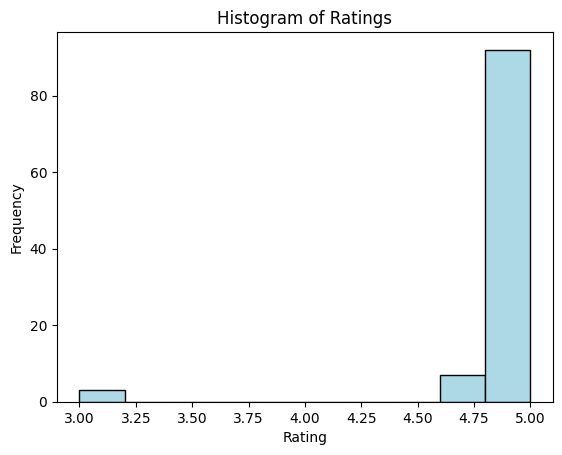

In [61]:
plt.hist(uk_df['Rating'], bins=10, color='lightblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

plt.show()

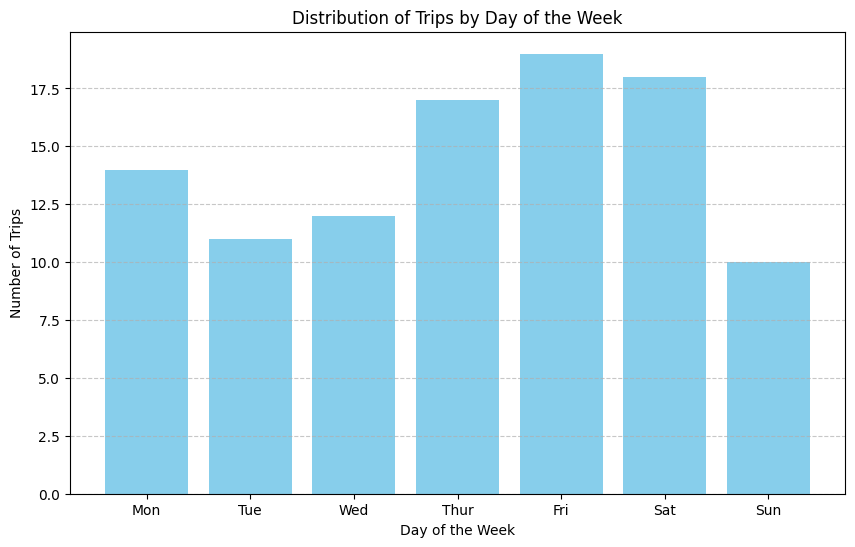

In [62]:
daily_trip_counts = uk_df['WeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
plt.bar(day_names, daily_trip_counts, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


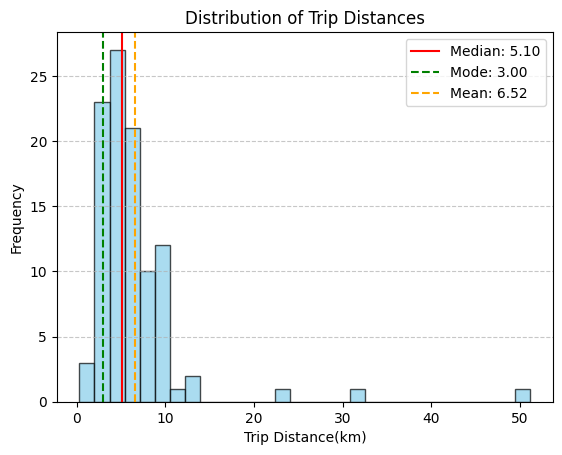

In [63]:
plt.hist(uk_df['TripKM'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

median_distance = uk_df['TripKM'].median()
mode_distance = uk_df['TripKM'].mode()[0]
mean_distance = uk_df['TripKM'].mean()

plt.axvline(x=median_distance, color='red', linestyle='-', label=f'Median: {median_distance:.2f}')
plt.axvline(x=mode_distance, color='green', linestyle='--', label=f'Mode: {mode_distance:.2f}')
plt.axvline(x=mean_distance, color='orange', linestyle='--', label=f'Mean: {mean_distance:.2f}')

plt.xlabel('Trip Distance(km)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


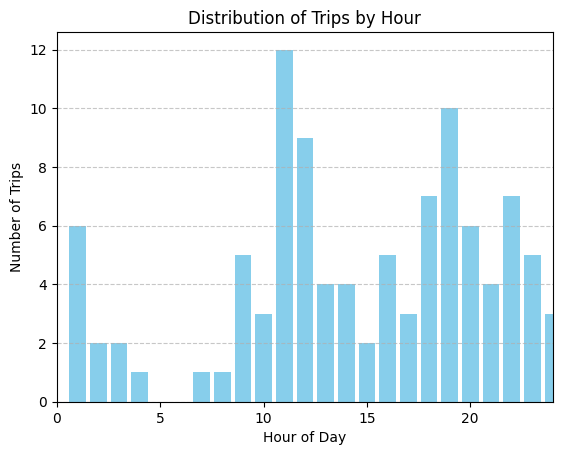

In [64]:
hourly_trip_counts = uk_df.groupby('OrderTime').size().reset_index(name='trip_count')

plt.bar(hourly_trip_counts['OrderTime'], hourly_trip_counts['trip_count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Hour')

plt.xlim(0, 24)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


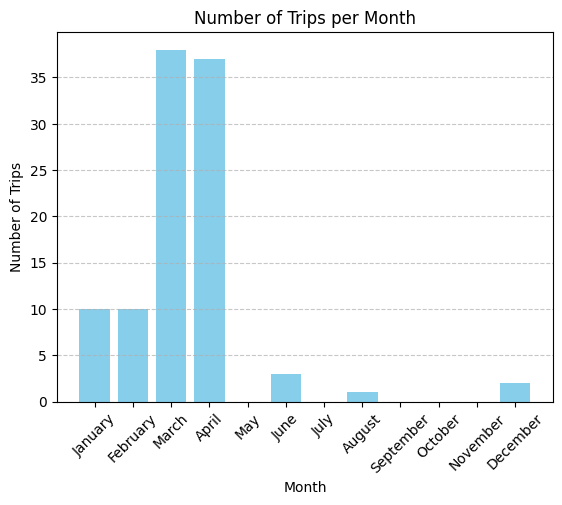

In [65]:
monthly_trip_counts = uk_df['Month'].value_counts().reindex(['January ', 'February', 'March', 'April', 'May', 'June',
                                                            'July', 'August', 'September', 'October', 'November', 'December'])

month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.bar(month_names, monthly_trip_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


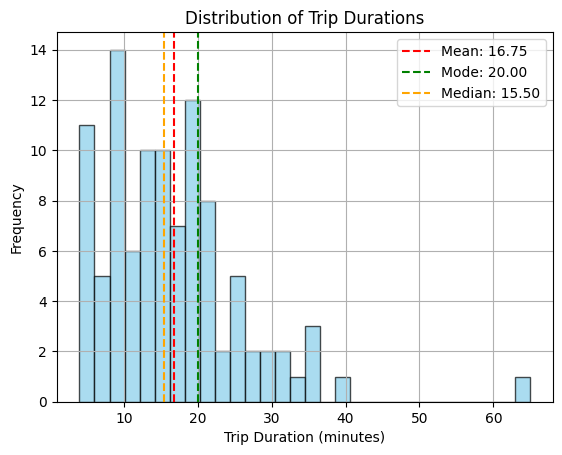

In [66]:
plt.hist(uk_df['Duration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

mean_duration = uk_df['Duration'].mean()
mode_duration = uk_df['Duration'].mode()[0]
median_duration = uk_df['Duration'].median()

plt.axvline(x=mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.2f}')
plt.axvline(x=mode_duration, color='green', linestyle='--', label=f'Mode: {mode_duration:.2f}')
plt.axvline(x=median_duration, color='orange', linestyle='--', label=f'Median: {median_duration:.2f}')

plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.legend()
plt.grid(True)
plt.show()


<h2>No serial correlation test</h2>

In [67]:
X = uk_df[["TripKM", 'Duration', 'Winter', 'Rating','curfew', 'Weekend', ]]
y = uk_df["Price"]

In [68]:
residuals = liner_uk_df.resid
print("Durbin-Watson Test:", sm.stats.stattools.durbin_watson(residuals))

Durbin-Watson Test: 2.1884489376604925


In Durbin-Watson Test a value of 2 indicates no autocorrelation at all, but on practice reaching 2 is almost impossible, so all the values from 1.5 to 2.5 are also considered as no autocorrelation, so we can state that we have to serial correlation.

<h2>No Perfect Collinearity</h2>

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

VIF:
   Variable       VIF
0    TripKM  3.101731
1  Duration  5.356655
2    Winter  1.166736
3    Rating  4.514573
4    curfew  1.291083
5   Weekend  1.400700


If Variance Inflation Factor is less then 5 that we can state that our variable is only slightly affected by multicollinearity, we can see that only Duration has VIF more then 5. This might be smaller if we had a larger samle, but anyway we can state that our model doesn't suffer from perfect collinearity, as if there is perfect collinearity, VIF would be more then 50.

<h2>Zero Conditional Mean (No Endogeneity)</h2>

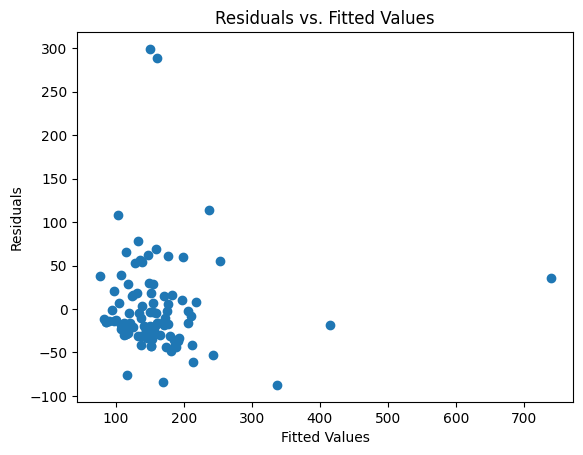

In [70]:
y_pred = liner_uk_df.predict(X)
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

As we don't see any pattern and almost all of the residuals are located near zero we can say that this assumption holds.

<h2>Homoscedasticity</h2>

In [71]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test:")
print("LM Statistic:", lm)
print("LM p-value:", lm_p_value)
print("F Statistic:", fvalue)
print("F p-value:", f_p_value)

Breusch-Pagan Test:
LM Statistic: 7.229793559537086
LM p-value: 0.20410352829045159
F Statistic: 1.2206019306844544
F p-value: 0.30249580263594006


<h2>Hypotheses testing</h2>

Here we have found a test which is called Breusch-Pagan test for heteroscedasticity. It uses the F-test and the LM(Lagrange multipllier) test. Here we are interested in LM test as it's null hypotheses is that our data posses homoscedasticity. Here we see that our p-value is 0.2, so we can't reject this 0 hypothesis

In [72]:
hypothesis = 'Rating = 0'
t_test = liner_uk_df.t_test(hypothesis)

test_statistic = t_test.tvalue[0, 0]
p_value = t_test.pvalue

print(test_statistic)
print(p_value)

0.3492825195116243
0.7276502516864909


Here we tried to check if the coefficient near Rating is 0. We conducted the two-sided test and found out that p-value is high, so we can't reject the H0

In [73]:
winter_beta = liner_uk_df.params['Winter']
winter_se = liner_uk_df.bse['Winter']
t_stat = (winter_beta - 0) / winter_se
t_stat
alpha = 0.05
critical_value = t_dist.ppf(1 - alpha, len(uk_df) - 1 - 6)
print("T statistics is: " + str(t_stat))
print("Critical value is: " + str(critical_value))


T statistics is: 0.7593808047165578
Critical value is: 1.6610518172519086


Here we cant't reject the 0 hypothesis as our t-statistisc is smaller then critical value. 

In [74]:
curfew_beta = liner_uk_df.params['curfew']
curfew_se = liner_uk_df.bse['curfew']
t_stat = (curfew_beta - 0) / curfew_se
t_stat
alpha = 0.05
critical_value = t_dist.ppf(1 - alpha, len(uk_df) - 1 - 6)
print("T statistics is: " + str(t_stat))
print("Critical value is: " + str(critical_value))

T statistics is: 0.9576705047735261
Critical value is: 1.6610518172519086


Here we have the same situraion as in previous test. 

<h2>Model testing</h2>


In [75]:
testinf_df_uk = pd.read_excel("db_test.xlsx")

testinf_df_uk['Winter'] = testinf_df_uk['Month'].isin(winter_months).astype(int)
testinf_df_uk['Weekend'] = testinf_df_uk['WeekDay'].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
testinf_df_uk["curfew"] = testinf_df_uk["OrderTime"].apply(lambda x: 1 if x in [23,0,1,2,3,4] else 0)
testinf_df_uk['Rating'] = testinf_df_uk['Rating'].astype(float)

X_test = testinf_df_uk[["TripKM", 'Duration', 'Winter', 'Rating','curfew', 'Weekend', ]]
y_test = testinf_df_uk["Price"]
y_pred = liner_uk_df.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 23.04419633213254
